## Park_HeeJi_HW08.ipynb
- Student Name: Hee Ji Park
- Github username : heejipark 
- USC ID: 4090715830
- Contact Email: heejipar@usc.edu

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

### Required libraries

In [1]:
import pandas as pd
import random
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import math
import collections
from scipy.special import softmax
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
col = ['IDs', 'class']
col.extend(['attr'+ str(i) for i in range(1,31)])
df = pd.read_csv('./../data/wdbc.data', header=None)
df.columns = col
df

,IDs,class,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,...,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set).

In [3]:
Bclass = df[df['class']=='B']
Mclass = df[df['class']=='M']
print(" The number of Benign class : {} \n The number of Malignant class : {}".format(len(Bclass), len(Mclass)))

 The number of Benign class : 357 
 The number of Malignant class : 212


In [4]:
B_trainIndex = random.sample(list(Bclass.index), int(len(Bclass)*0.8))
B_testIndex = [x for x in list(Bclass.index) if x not in B_trainIndex]
M_trainIndex = random.sample(list(Mclass.index), int(len(Mclass)*0.8))
M_testIndex = [x for x in list(Mclass.index) if x not in M_trainIndex]

B_train, B_test = Bclass.loc[B_trainIndex,:], Bclass.loc[B_testIndex,:]
M_train, M_test = Mclass.loc[M_trainIndex,:], Mclass.loc[M_testIndex,:]

print("The number of B class for train set : {}".format(len(B_train)))
print("The number of B class for test set : {}".format(len(B_test)))
print("The number of M class for train set : {}".format(len(M_train)))
print("The number of M class for test set : {}".format(len(M_test)))
print()
train = pd.concat([B_train, M_train], axis=0, ignore_index=True)
test = pd.concat([B_test, M_test], axis=0, ignore_index=True)
print("The total number of train set : {}".format(len(train)))
print("The total number of test set : {}".format(len(test)))

The number of B class for train set : 285
The number of B class for test set : 72
The number of M class for train set : 169
The number of M class for test set : 43

The total number of train set : 454
The total number of test set : 115


In [5]:
train.head()

,IDs,class,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,...,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30
0,891703,B,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,...,13.06,25.75,84.35,517.8,0.13690,0.1758,0.131600,0.09140,0.3101,0.07007
1,895299,B,12.03,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,...,13.07,22.25,82.74,523.4,0.10130,0.0739,0.007732,0.02796,0.2171,0.07037
2,868682,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.035030,0.028750,...,12.32,22.02,79.93,462.0,0.11900,0.1648,0.139900,0.08476,0.2676,0.06765
3,904689,B,12.96,18.29,84.18,525.2,0.07351,0.07899,0.040570,0.018830,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.160400,0.06608,0.3207,0.07247
4,898690,B,11.47,16.03,73.02,402.7,0.09076,0.05886,0.025870,0.023220,...,12.51,20.79,79.67,475.8,0.15310,0.1120,0.098230,0.06548,0.2851,0.08763


### (b) Monte-Carlo Simulation: 
- Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times
- Use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). 
- Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

#### i. <b>Supervised Learning:</b> Train an L1-penalized SVM to classify the data. 
- Use 5 fold cross validation to choose the penalty parameter. 
- Use normalized data. 
- Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs.
- Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [6]:
def getScore(model, dataName, X, y, y_pred):
    acc = accuracy_score(y, y_pred)
    pre = precision_score(y, y_pred)
    re = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    fpr, tpr, threshold = roc_curve(y, model.decision_function(X))
    auc_score = auc(fpr, tpr)
    return (acc, pre, re, f1, auc_score)

In [7]:
def plotROC_CM(model, dataName, X, y, y_pred):
    ################# For Training Set
    print('########### For {} Set'.format(dataName))

    ### Confusion matrix
    cm = confusion_matrix(y, y_pred)
    print('- Confusion matrix for training set: \n', cm)
    
    ### AUC
    fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
    roc_auc = auc(fpr, tpr)
    print('- For {}, AUC score: {}'.format(dataName, roc_auc))

    ### ROC
    print('- For {}, ROC curves'.format(dataName))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

M = 1 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 2 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 3 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 4 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 5 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 6 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 7 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 8 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 9 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 10 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 11 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 12 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 13 time -------------------------------- 
 - Best Parameter 'C': 1.0

M = 14 time -------------------------------- 
 

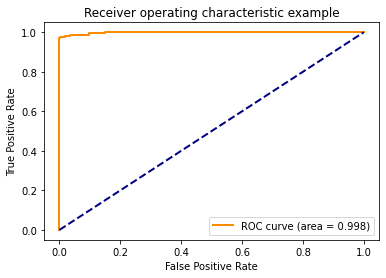



########### For Test Set
- Confusion matrix for training set: 
 [[70  2]
 [ 0 43]]
- For Test, AUC score: 0.999031007751938
- For Test, ROC curves


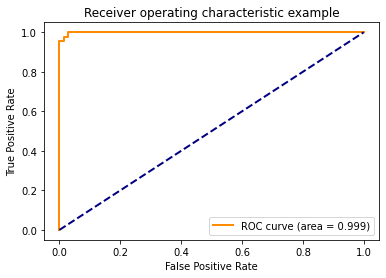

In [8]:
train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []
for repeat in range(1, 31):
    print("M = %d time -------------------------------- "% repeat)
    
    train_X = train.iloc[:,2:]
    train_y = train['class'].replace('B', 0).replace('M', 1)
    
    test_X = test.iloc[:,2:]
    test_y = test['class'].replace('B', 0).replace('M', 1)
    
    # Standardized attributes
    scaler = preprocessing.StandardScaler()
    scaler = scaler.fit(train_X)
    train_X_scale = scaler.transform(train_X)
    test_X_scale = scaler.transform(test_X)
    
    parameters = {'C':np.logspace(-3, 6, 10)}
    clf = LinearSVC(penalty='l1', dual=False, max_iter=120000)
    clf = GridSearchCV(clf, param_grid=parameters, cv=KFold(5)).fit(train_X_scale, train_y)
    
    # Completed get the best estimator.
    # Refit the model and predict with test data set
    print(" - Best Parameter 'C': {}\n".format(clf.best_params_['C']))
    l1SVMmodel = clf.best_estimator_
    l1SVMmodel = l1SVMmodel.fit(train_X_scale, train_y)
    
    # Store train set result
    train_y_pred = l1SVMmodel.predict(train_X_scale)
    acc, pre, re, f1, auc_score = getScore(l1SVMmodel, 'Train', train_X_scale, train_y, train_y_pred)
    train_accuracy.append(acc)
    train_precision.append(pre)
    train_recall.append(re)
    train_f1.append(f1)
    train_auc.append(auc_score)

    # Store test set result
    test_y_pred = l1SVMmodel.predict(test_X_scale)
    acc, pre, re, f1, auc_score = getScore(l1SVMmodel, 'Test', test_X_scale, test_y, test_y_pred)
    test_accuracy.append(acc)
    test_precision.append(pre)
    test_recall.append(re)
    test_f1.append(f1)
    test_auc.append(auc_score)
    
    
    # Plot the ROC and report the confusion matrix for training and testing in one of the runs.
    if repeat == 30:
        print('########### REPORT for confusion matrix, AUC, ROC curve for train and test sets ###########')

        plotROC_CM(clf, 'Train', train_X_scale, train_y, train_y_pred)
        print("\n")
        plotROC_CM(clf, 'Test', test_X_scale, test_y, test_y_pred)

<b> Answer: </b>
- In the result above, I conducted plot the ROC and report the confusion matrix for training and testing when in one of the runs, M=30.

In [9]:
report_supervised = pd.DataFrame([np.mean(train_accuracy), np.mean(test_accuracy)], columns=['avg Accuracy'], index=['Train with Supervised learning', 'Test with Supervised learning'])
report_supervised['avg Precision'] = [np.mean(train_precision), np.mean(test_precision)]
report_supervised['avg Recall'] = [np.mean(train_recall), np.mean(test_recall)]
report_supervised['avg F1-score'] = [np.mean(train_f1), np.mean(test_f1)]
report_supervised['avg AUC score'] = [np.mean(train_auc), np.mean(test_auc)]
report_supervised


,avg Accuracy,avg Precision,avg Recall,avg F1-score,avg AUC score
Train with Supervised learning,0.986711,0.993938,0.970217,0.981934,0.998165
Test with Supervised learning,0.982899,0.956279,1.000000,0.977647,0.999042


<b> Answer: </b>
- In the result above, the table contains the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over 30 runs.

<hr>

### ii. Semi-Supervised Learning/ Self-training
- Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [10]:
Bclass = train[train['class']=='B']
Mclass = train[train['class']=='M']

In [11]:
B_trainIndex_label = random.sample(list(Bclass.index), int(len(Bclass)*0.5))
B_trainIndex_unlabel = [x for x in list(Bclass.index) if x not in B_trainIndex_label]
M_trainIndex_unlabel = random.sample(list(Mclass.index), int(len(Mclass)*0.5))
M_trainIndex_label = [x for x in list(Mclass.index) if x not in M_trainIndex_unlabel]

B_label, B_unlabel = Bclass.loc[B_trainIndex_label,:], Bclass.loc[B_trainIndex_unlabel,:]
M_label, M_unlabel = Mclass.loc[M_trainIndex_label,:], Mclass.loc[M_trainIndex_unlabel,:]

train_label = pd.concat([B_label, M_label], axis=0, ignore_index=True)
train_unlabel = pd.concat([B_unlabel, M_unlabel], axis=0, ignore_index=True)
print("The number of labeled data in the training set : {}".format(len(train_label)))
print("The number of unlabelled data in the training set : {}".format(len(train_unlabel)))

The number of labeled data in the training set : 227
The number of unlabelled data in the training set : 227


In [12]:
train_label.head()

,IDs,class,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,...,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30
0,8812818,B,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.04451,...,14.98,17.13,101.10,686.6,0.1376,0.2698,0.25770,0.09090,0.3065,0.08177
1,86561,B,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,...,15.49,23.58,100.30,725.9,0.1157,0.1350,0.08115,0.05104,0.2364,0.07182
2,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
3,901549,B,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
4,9010872,B,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,...,18.13,25.45,117.20,1009.0,0.1338,0.1679,0.16630,0.09123,0.2394,0.06469


In [13]:
train_unlabel.head()

,IDs,class,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,...,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30
0,868682,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.13990,0.08476,0.2676,0.06765
1,898690,B,11.47,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,...,12.51,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763
2,905557,B,14.99,22.11,97.53,693.7,0.08515,0.10250,0.06859,0.03876,...,16.76,31.55,110.20,867.1,0.1077,0.3345,0.31140,0.13080,0.3163,0.09251
3,871641,B,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,...,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313
4,909410,B,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,...,14.91,19.31,96.53,688.9,0.1034,0.1017,0.06260,0.08216,0.2136,0.06710


#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. 
- Choose the penalty parameter using 5 fold cross validation.

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. 
- Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. 
- Continue this process until all unlabeled data are used. 
- Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. 
- Plot the ROC and report the confusion matrix for training and testing in one of the runs.

M = 1 time -------------------------------- 
 - Best Parameter 'C': 10000.0

M = 2 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 3 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 4 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 5 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 6 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 7 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 8 time -------------------------------- 
 - Best Parameter 'C': 100000.0

M = 9 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 10 time -------------------------------- 
 - Best Parameter 'C': 10000.0

M = 11 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 12 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 13 time -------------------------------- 
 - Best Parameter 'C': 1000.0

M = 

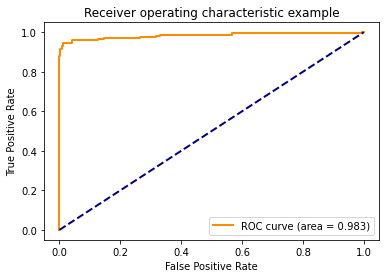



########### For Test Set
- Confusion matrix for training set: 
 [[67  5]
 [ 1 42]]
- For Test, AUC score: 0.9870801033591731
- For Test, ROC curves


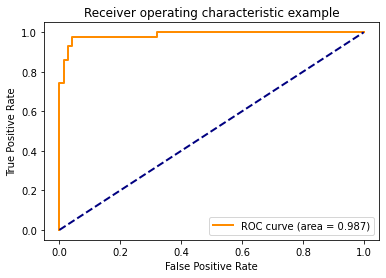

In [14]:
train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []

for repeat in range(1, 31):
    print("M = %d time -------------------------------- "% repeat)
    
    train_X_l = train_label.iloc[:,2:]
    train_y_l = train_label['class'].replace('B', 0).replace('M', 1)
    
    train_X_un = train_unlabel.iloc[:,2:]

    ### A. Train an L1-penalized SVM to classify the labeled data Use normalized data.
    # Standardized attributes
    scaler = preprocessing.StandardScaler()
    scaler = scaler.fit(train_X_l)
    train_X_scale = scaler.transform(train_X_l)
    train_X_scale_un = scaler.transform(train_X_un)
    
    parameters = {'C':np.logspace(-3, 6, 10)}
    clf = LinearSVC(penalty='l1', dual=False, max_iter=120000)
    clf = GridSearchCV(clf, param_grid=parameters, cv=KFold(5)).fit(train_X_scale, train_y_l)
    
    # Completed get the best estimator.
    # Refit the model and predict with test data set
    print(" - Best Parameter 'C': {}\n".format(clf.best_params_['C']))
    l1SVMmodel = clf.best_estimator_
    l1SVMmodel = l1SVMmodel.fit(train_X_scale, train_y_l)
    
    ### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM.
    train_X_scale = list(np.array(train_X_scale))
    train_X_scale_un = list(np.array(train_X_scale_un))
    
    while(len(train_X_scale_un)>0):
        dist = np.absolute(clf.decision_function(train_X_scale_un))
        farthest_idx = np.argmax(dist) # find fartest datapoint
        farthest_pt = np.array(train_X_scale_un[farthest_idx]).reshape(1,30)
        farthest_pt_predict = l1SVMmodel.predict(farthest_pt)
        train_X_scale_un = np.delete(train_X_scale_un, farthest_idx, axis=0)
        train_X_scale = np.append(train_X_scale, farthest_pt, axis=0)
        train_y_l = np.append(train_y_l, farthest_pt_predict, axis=0)
        l1SVMmodel.fit(train_X_scale, train_y_l)
    
    
    ### Test the final SVM and store the accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs.
    train_X = train.iloc[:,2:]
    train_y = train['class'].replace('B', 0).replace('M', 1)
    
    test_X = test.iloc[:,2:]
    test_y = test['class'].replace('B', 0).replace('M', 1)
    
    train_tot_X_scale = scaler.transform(train_X)
    test_X_scale = scaler.transform(test_X)

    # Store train set result
    train_y_pred = l1SVMmodel.predict(train_tot_X_scale)
    acc, pre, re, f1, auc_score = getScore(l1SVMmodel, 'Train', train_tot_X_scale, train_y, train_y_pred)
    train_accuracy.append(acc)
    train_precision.append(pre)
    train_recall.append(re)
    train_f1.append(f1)
    train_auc.append(auc_score)

    # Store test set result
    test_y_pred = l1SVMmodel.predict(test_X_scale)
    acc, pre, re, f1, auc_score = getScore(l1SVMmodel, 'Test', test_X_scale, test_y, test_y_pred)
    test_accuracy.append(acc)
    test_precision.append(pre)
    test_recall.append(re)
    test_f1.append(f1)
    test_auc.append(auc_score)
    
    
    ### Plot the ROC and report the confusion matrix for training and testing in one of the runs.
    if repeat == 30:
        print('########### REPORT for confusion matrix, AUC, ROC curve for train and test sets ###########')
        plotROC_CM(clf, 'Train', train_tot_X_scale, train_y, train_y_pred)
        print("\n")
        plotROC_CM(clf, 'Test', test_X_scale, test_y, test_y_pred)

<b> Answer: </b>
- In the result above, I conducted plot the ROC and report the confusion matrix for training and testing when in one of the runs, M=30.

In [15]:
report_semi_supervised = pd.DataFrame([np.mean(train_accuracy), np.mean(test_accuracy)], columns=['avg Accuracy'], index=['Train with Semi-supervised learning', 'Test with Semi-supervised learning'])
report_semi_supervised['avg Precision'] = [np.mean(train_precision), np.mean(test_precision)]
report_semi_supervised['avg Recall'] = [np.mean(train_recall), np.mean(test_recall)]
report_semi_supervised['avg F1-score'] = [np.mean(train_f1), np.mean(test_f1)]
report_semi_supervised['avg AUC score'] = [np.mean(train_auc), np.mean(test_auc)]
report_semi_supervised


,avg Accuracy,avg Precision,avg Recall,avg F1-score,avg AUC score
Train with Semi-supervised learning,0.969971,0.972248,0.946351,0.959122,0.982994
Test with Semi-supervised learning,0.940870,0.885106,0.967442,0.924444,0.988103


<b> Answer: </b>
- In the result above, the table contains the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over 30 runs.

<hr>

### iii. Unsupervised Learning:
- Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

<b> Answer : </b>
I choose to change the n_init parameter from 10 to 20 in order to prevent trapping in a local minimum. Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. 
- Read the true labels of those 30 data points and take a majority poll within them. 
- The majority poll becomes the label predicted by k-means for the members of each cluster. 
- Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

#### C. Classify test data based on their proximity to the centers of the clusters. 
- Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data

In [16]:
def plotROC_CM(model, dataName, X, distance, y, y_pred, plabel):
    print('########### For {} Set'.format(dataName))

    ### Confusion matrix
    cm = confusion_matrix(y, y_pred)
    print('- Confusion matrix for training set: \n', cm)
    
    ### AUC
    fpr, tpr, thresholds = roc_curve(y, [i[1] for i in softmax(distance)], pos_label = plabel)
    roc_auc = auc(fpr, tpr)
    print('- For {}, AUC score: {}'.format(dataName, roc_auc))

    ### ROC
    print('- For {}, ROC curves'.format(dataName))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

M = 1 time -------------------------------- 
Train Accuracy :  0.9052863436123348
Train Precision :  0.8987341772151899
Train Recall :  0.8402366863905325
Train F1-score :  0.8685015290519877
Train AUC score :  0.8784179383369667

Test Accuracy :  0.9130434782608695
Test Precision :  0.9459459459459459
Test Recall :  0.813953488372093
Test F1-score :  0.875
Test AUC score :  0.8165374677002584


M = 2 time -------------------------------- 
Train Accuracy :  0.9052863436123348
Train Precision :  0.8987341772151899
Train Recall :  0.8402366863905325
Train F1-score :  0.8685015290519877
Train AUC score :  0.8784179383369667

Test Accuracy :  0.9130434782608695
Test Precision :  0.9459459459459459
Test Recall :  0.813953488372093
Test F1-score :  0.875
Test AUC score :  0.8165374677002584


M = 3 time -------------------------------- 
Train Accuracy :  0.9052863436123348
Train Precision :  0.8987341772151899
Train Recall :  0.8402366863905325
Train F1-score :  0.8685015290519877
Train AUC 

Train Accuracy :  0.9052863436123348
Train Precision :  0.8987341772151899
Train Recall :  0.8402366863905325
Train F1-score :  0.8685015290519877
Train AUC score :  0.8784179383369667

Test Accuracy :  0.9130434782608695
Test Precision :  0.9459459459459459
Test Recall :  0.813953488372093
Test F1-score :  0.875
Test AUC score :  0.8165374677002584


M = 23 time -------------------------------- 
Train Accuracy :  0.9052863436123348
Train Precision :  0.8987341772151899
Train Recall :  0.8402366863905325
Train F1-score :  0.8685015290519877
Train AUC score :  0.9051178241461644

Test Accuracy :  0.9130434782608695
Test Precision :  0.9459459459459459
Test Recall :  0.813953488372093
Test F1-score :  0.875
Test AUC score :  0.9047157622739017


M = 24 time -------------------------------- 
Train Accuracy :  0.9052863436123348
Train Precision :  0.8987341772151899
Train Recall :  0.8402366863905325
Train F1-score :  0.8685015290519877
Train AUC score :  0.9051178241461644

Test Accuracy 

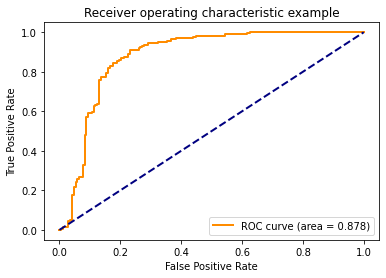



########### For Test Set
- Confusion matrix for training set: 
 [[70  2]
 [ 8 35]]
- For Test, AUC score: 0.8165374677002584
- For Test, ROC curves


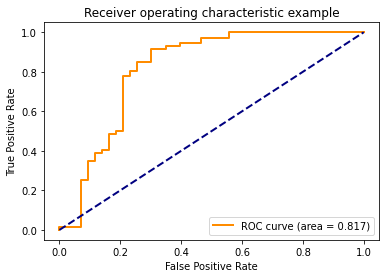

In [17]:
train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []

test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []

for repeat in range(1, 31):
    print("M = %d time -------------------------------- "% repeat)
    
    train_X = train.iloc[:,2:]
    train_y = train['class'].replace('B', 0).replace('M', 1)
    
    test_X = test.iloc[:,2:]
    test_y = test['class'].replace('B', 0).replace('M', 1)

    # Standardized attributes
    scaler = preprocessing.StandardScaler()
    scaler = scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    
    # Model
    kmeans = KMeans(n_clusters = 2, n_init = 20)
    
    # For train -------------------------------------------------------------------
    pred_distance = kmeans.fit_transform(train_X)
 
    # find cloeset data point to each cluster
    cloeset_distance_0 = sorted([(idx, pred_distance[idx][0]) for idx in range(len(pred_distance))],key = lambda x:x[1])[:30]
    cloeset_distance_1 = sorted([(idx, pred_distance[idx][1]) for idx in range(len(pred_distance))],key = lambda x:x[1])[:30]
    
    # Collect data point's real values which is closet to cluster
    find_majority_0 = []
    for idx, dis in cloeset_distance_0:
        find_majority_0.append(train_y.loc[idx])
    
    find_majority_1 = []
    for idx, val in cloeset_distance_1:
        find_majority_1.append(train_y.loc[idx])
    
    # Find majority values
    majority_0 = collections.Counter(find_majority_0).most_common()[0][0]
    majority_1 = collections.Counter(find_majority_1).most_common()[0][0]

    y_pred = np.array([0] * len(train_y))
    for i in np.where(kmeans.labels_ == 0):
        y_pred[i] = majority_0
    for i in np.where(kmeans.labels_ == 1):
        y_pred[i] = majority_1
    
    train_y = np.array(train_y)
    y_pred = np.array(y_pred)
    acc = accuracy_score(train_y, y_pred)
    pre = precision_score(train_y, y_pred)
    re = recall_score(train_y, y_pred)
    f1 = f1_score(train_y, y_pred)
    fpr, tpr, thresholds = roc_curve(train_y, [i[1] for i in softmax(pred_distance)], pos_label = majority_0)
    roc_auc = auc(fpr, tpr)
    
    train_accuracy.append(acc)
    train_precision.append(pre)
    train_recall.append(re)
    train_f1.append(f1)
    train_auc.append(roc_auc)

    print("Train Accuracy : ", acc)
    print("Train Precision : ", pre)
    print("Train Recall : ", re)
    print("Train F1-score : ", f1)
    print("Train AUC score : ", roc_auc)
    print()
    
    # For test -------------------------------------------------------------------
    pred_test = kmeans.predict(test_X)
    pred_test_distance = kmeans.transform(test_X)
    test_y_pred = np.array([0] * len(test_y))
    for i in np.where(pred_test == 0):
        test_y_pred[i] = majority_0
    for i in np.where(pred_test == 1):
        test_y_pred[i] = majority_1
        
    acc = accuracy_score(test_y, test_y_pred)
    pre = precision_score(test_y, test_y_pred)
    re = recall_score(test_y, test_y_pred)
    f1 = f1_score(test_y, test_y_pred)
    fpr, tpr, thresholds = roc_curve(test_y, [i[1] for i in softmax(pred_test_distance)], pos_label = majority_0)
    roc_auc = auc(fpr, tpr)
    
    test_accuracy.append(acc)
    test_precision.append(pre)
    test_recall.append(re)
    test_f1.append(f1)
    test_auc.append(roc_auc)
    
    print("Test Accuracy : ", acc)
    print("Test Precision : ", pre)
    print("Test Recall : ", re)
    print("Test F1-score : ", f1)
    print("Test AUC score : ", roc_auc)
    print()
    print()
    
    # Plot the ROC and report the confusion matrix for training and testing in one of the runs.
    if repeat == 30:
        print()
        print('########### REPORT for confusion matrix, AUC, ROC curve for train and test sets ###########')
        plotROC_CM(kmeans, 'Train', train_X, pred_distance, train_y, y_pred, majority_0)
        print("\n")
        plotROC_CM(kmeans, 'Test', test_X, pred_test_distance, test_y, test_y_pred, majority_0)

<b> Answer: </b>
- In the result above, I conducted plot the ROC and report the confusion matrix for training and testing when in one of the runs, M=30.

In [18]:
report_unsupervised = pd.DataFrame([np.mean(train_accuracy), np.mean(test_accuracy)], columns=['avg Accuracy'], index=['Train with Unsupervised learning', 'Test with Unsupervised learning'])
report_unsupervised['avg Precision'] = [np.mean(train_precision), np.mean(test_precision)]
report_unsupervised['avg Recall'] = [np.mean(train_recall), np.mean(test_recall)]
report_unsupervised['avg F1-score'] = [np.mean(train_f1), np.mean(test_f1)]
report_unsupervised['avg AUC score'] = [np.mean(train_auc), np.mean(test_auc)]
report_unsupervised

,avg Accuracy,avg Precision,avg Recall,avg F1-score,avg AUC score
Train with Unsupervised learning,0.905286,0.898734,0.840237,0.868502,0.889098
Test with Unsupervised learning,0.913043,0.945946,0.813953,0.875000,0.851809


<b> Answer: </b>
- In the result above, the table contains the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over 30 runs.

<hr>

### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.
- Research what spectral clustering is. 

<b> Answer :</b>
In multivariate statistics, spectral clustering techniques make use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. The similarity matrix is provided as an input and consists of a quantitative assessment of the relative similarity of each pair of points in the dataset.

Also, Spectral clustering helps us overcome a major problem in clustering: one being the shape of the cluster and the other is determining the cluster centroid. K-means algorithm generally assumes that the clusters are spherical or round i.e. within k-radius from the cluster centroid. In K means, many iterations are required to determine the cluster centroid. In spectral, the clusters do not follow a fixed shape or pattern. Points that are far away but connected belong to the same cluster and the points which are less distant from each other could belong to different clusters if they are not connected. This implies that the algorithm could be effective for data of different shapes and sizes.


- Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members).
- Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit−predict method.

In [19]:
def plotROC_CM(model, dataName, X, y, y_pred, plabel):
    print('########### For {} Set'.format(dataName))

    ### Confusion matrix
    cm = confusion_matrix(y, y_pred)
    print('- Confusion matrix for training set: \n', cm)
    
    ### AUC
    fpr, tpr, thresholds = roc_curve(y, y_pred, pos_label = plabel)
    roc_auc = auc(fpr, tpr)
    print('- For {}, AUC score: {}'.format(dataName, roc_auc))

    ### ROC
    print('- For {}, ROC curves'.format(dataName))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.3f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

M = 1 time -------------------------------- 
Train Accuracy :  0.43171806167400884
Train Precision :  0.38005390835579517
Train Recall :  0.834319526627219
Train F1-score :  0.5222222222222223
Train AUC score :  0.48634900861621505

Test Accuracy :  0.5043478260869565
Test Precision :  0.42045454545454547
Test Recall :  0.8604651162790697
Test F1-score :  0.5648854961832062
Test AUC score :  0.4239341085271318


M = 2 time -------------------------------- 
Train Accuracy :  0.42070484581497797
Train Precision :  0.36257309941520466
Train Recall :  0.7337278106508875
Train F1-score :  0.48532289628180036
Train AUC score :  0.5155922350254335

Test Accuracy :  0.5391304347826087
Test Precision :  0.3611111111111111
Test Recall :  0.3023255813953488
Test F1-score :  0.32911392405063294
Test AUC score :  0.5085594315245477


M = 3 time -------------------------------- 
Train Accuracy :  0.5088105726872246
Train Precision :  0.39453125
Train Recall :  0.5976331360946746
Train F1-score :  0.

Train Accuracy :  0.5616740088105727
Train Precision :  0.3584905660377358
Train Recall :  0.22485207100591717
Train F1-score :  0.27636363636363637
Train AUC score :  0.5068722101110765

Test Accuracy :  0.6521739130434783
Test Precision :  0.5555555555555556
Test Recall :  0.3488372093023256
Test F1-score :  0.4285714285714286
Test AUC score :  0.4089147286821706


M = 23 time -------------------------------- 
Train Accuracy :  0.5991189427312775
Train Precision :  0.37254901960784315
Train Recall :  0.11242603550295859
Train F1-score :  0.17272727272727273
Train AUC score :  0.49992733312571364

Test Accuracy :  0.5304347826086957
Test Precision :  0.3829787234042553
Test Recall :  0.4186046511627907
Test F1-score :  0.4
Test AUC score :  0.49208656330749345


M = 24 time -------------------------------- 
Train Accuracy :  0.4977973568281938
Train Precision :  0.3805668016194332
Train Recall :  0.5562130177514792
Train F1-score :  0.45192307692307687
Train AUC score :  0.49031454375

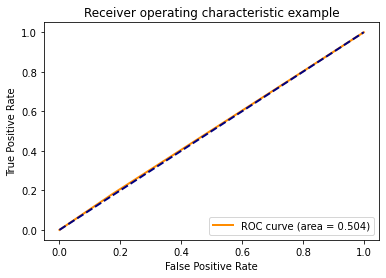



########### For Test Set
- Confusion matrix for training set: 
 [[26 46]
 [13 30]]
- For Test, AUC score: 0.47060723514211883
- For Test, ROC curves


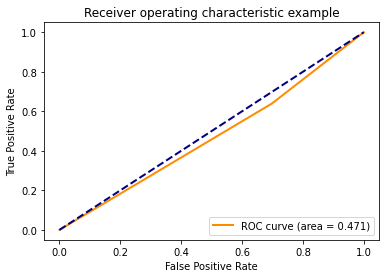

In [20]:
train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []

test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []

for repeat in range(1, 31):
    print("M = %d time -------------------------------- "% repeat)
    
    train_X = train.iloc[:,2:]
    train_y = train['class'].replace('B', 0).replace('M', 1)
    
    test_X = test.iloc[:,2:]
    test_y = test['class'].replace('B', 0).replace('M', 1)

    # Standardized attributes
    scaler = preprocessing.StandardScaler()
    scaler = scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    
    model = SpectralClustering(n_clusters=2, n_init = 20, affinity='rbf', gamma=1e+3)
    pred_train = model.fit_predict(train_X)
    
    # For train -------------------------------------------------------------------
    y_pred = np.array([0] * len(train_y))
    
    cluster0_idx = np.where(pred_train == 0)
    cluster1_idx = np.where(pred_train == 1)
    majority_cluster0 = collections.Counter(pred_train[cluster0_idx]).most_common(1)[0][0]
    majority_cluster1 = collections.Counter(pred_train[cluster1_idx]).most_common(1)[0][0]
    
    y_pred[cluster0_idx] = majority_cluster0
    y_pred[cluster1_idx] = majority_cluster1
    
    train_y = np.array(train_y)
    y_pred = np.array(y_pred)
    acc = accuracy_score(train_y, y_pred)
    pre = precision_score(train_y, y_pred)
    re = recall_score(train_y, y_pred)
    f1 = f1_score(train_y, y_pred)
    fpr, tpr, thresholds = roc_curve(train_y, y_pred, pos_label = majority_0)
    roc_auc = auc(fpr, tpr)
    
    train_accuracy.append(acc)
    train_precision.append(pre)
    train_recall.append(re)
    train_f1.append(f1)
    train_auc.append(roc_auc)

    print("Train Accuracy : ", acc)
    print("Train Precision : ", pre)
    print("Train Recall : ", re)
    print("Train F1-score : ", f1)
    print("Train AUC score : ", roc_auc)
    print()
    
    # For test -------------------------------------------------------------------
    pred_test = model.fit_predict(test_X)
    
    test_y_pred = np.array([0] * len(test_y))
    for i in np.where(pred_test == 0):
        test_y_pred[i] = majority_cluster0
    for i in np.where(pred_test == 1):
        test_y_pred[i] = majority_cluster1
        
    acc = accuracy_score(test_y, test_y_pred)
    pre = precision_score(test_y, test_y_pred)
    re = recall_score(test_y, test_y_pred)
    f1 = f1_score(test_y, test_y_pred)
    fpr, tpr, thresholds = roc_curve(test_y, test_y_pred, pos_label = majority_0)
    roc_auc = auc(fpr, tpr)
    
    test_accuracy.append(acc)
    test_precision.append(pre)
    test_recall.append(re)
    test_f1.append(f1)
    test_auc.append(roc_auc)
    
    print("Test Accuracy : ", acc)
    print("Test Precision : ", pre)
    print("Test Recall : ", re)
    print("Test F1-score : ", f1)
    print("Test AUC score : ", roc_auc)
    print()
    print()
    
    # Plot the ROC and report the confusion matrix for training and testing in one of the runs.
    if repeat == 30:
        print()
        print('########### REPORT for confusion matrix, AUC, ROC curve for train and test sets ###########')
        plotROC_CM(model, 'Train', train_X, train_y, y_pred, majority_0)
        print("\n")
        plotROC_CM(model, 'Test', test_X, test_y, test_y_pred, majority_0)

<b> Answer: </b>
- In the result above, I conducted plot the ROC and report the confusion matrix for training and testing when in one of the runs, M=30.

In [21]:
report_spectral_clustering = pd.DataFrame([np.mean(train_accuracy), np.mean(test_accuracy)], columns=['avg Accuracy'], index=['Train with Spectral_clustering', 'Test with Spectral_clustering'])
report_spectral_clustering['avg Precision'] = [np.mean(train_precision), np.mean(test_precision)]
report_spectral_clustering['avg Recall'] = [np.mean(train_recall), np.mean(test_recall)]
report_spectral_clustering['avg F1-score'] = [np.mean(train_f1), np.mean(test_f1)]
report_spectral_clustering['avg AUC score'] = [np.mean(train_auc), np.mean(test_auc)]
report_spectral_clustering

,avg Accuracy,avg Precision,avg Recall,avg F1-score,avg AUC score
Train with Spectral_clustering,0.513289,0.369159,0.451874,0.358608,0.499209
Test with Spectral_clustering,0.513623,0.376175,0.446512,0.391548,0.499892


<b> Answer: </b>
- In the result above, the table contains the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over 30 runs.

<hr>

### v. Compare the results.
- One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.
- One can expect that unsupervised learning underperforms in such situations. 
- Compare the results you obtained by those methods.

In [22]:
CompareReport = pd.concat([report_supervised, report_semi_supervised, report_unsupervised, report_spectral_clustering])
CompareReport

,avg Accuracy,avg Precision,avg Recall,avg F1-score,avg AUC score
Train with Supervised learning,0.986711,0.993938,0.970217,0.981934,0.998165
Test with Supervised learning,0.982899,0.956279,1.000000,0.977647,0.999042
Train with Semi-supervised learning,0.969971,0.972248,0.946351,0.959122,0.982994
Test with Semi-supervised learning,0.940870,0.885106,0.967442,0.924444,0.988103
Train with Unsupervised learning,0.905286,0.898734,0.840237,0.868502,0.889098
Test with Unsupervised learning,0.913043,0.945946,0.813953,0.875000,0.851809
Train with Spectral_clustering,0.513289,0.369159,0.451874,0.358608,0.499209
Test with Spectral_clustering,0.513623,0.376175,0.446512,0.391548,0.499892


<B> Answer: </B>
- 

- Overal accuracy & F1 score :
    - Supervised learning > Semi-supervised learning > Unsupervised learning (Kmeans > Spectral clustering)
- Report : 
    - Looking at the table with the above results, supervised learning with all datasets has the highest accuracy. Next, semi-supervised learning using 50% of the data has the second highest accuracy. In the case of unsupervised learning, since the label is not learned and classified only by similarity, it is confirmed that the accuracy is relatively low compared to the actual ground-truth, but still has a certain degree of accuracy. In spectral clustering, clusters do not follow a fixed shape or pattern. Points that are far apart but connected may belong to the same cluster, and points less distant from each other may belong to different clusters if they are not connected. For this reason, while an algorithm can be effective on data of different shapes and sizes, it can also negatively affect the results of learning data with similar shapes and sizes. Therefore, I thought that the lowest accuracy was obtained.

<hr>

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. 
- Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [23]:
df = pd.read_csv('../data/data_banknote_authentication.txt', names = ['Variance','Skewness','Curtosis','Entropy','Class'])
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [24]:
train_label = random.sample(list(df.index), 900)
test_label = [i for i in range(len(df)) if i not in train_label]

train = df.loc[train_label,:].reset_index(drop=True)
test = df.loc[test_label,:].reset_index(drop=True)

print(len(train), len(test))

900 472


In [25]:
train

,Variance,Skewness,Curtosis,Entropy,Class
0,2.39250,9.79800,-3.03610,-2.82240,0
1,0.37980,0.70980,0.75720,-0.44440,0
2,1.76200,4.36820,2.13840,0.75429,0
3,-1.99220,11.65420,2.65420,-5.21070,0
4,4.07130,10.40230,-4.17220,-4.75820,0
...,...,...,...,...,...
895,3.14520,5.82500,-0.51439,-1.49440,0
896,3.24220,6.22650,0.12224,-1.44660,0
897,-0.24037,-1.78370,2.13500,1.24180,1
898,-1.95510,-6.97560,5.53830,-0.12889,1


In [26]:
test

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.80730,-0.446990,0
1,3.45660,9.52280,-4.01120,-3.594400,0
2,0.32924,-4.45520,4.57180,-0.988800,0
3,1.22470,8.77790,-2.21350,-0.806470,0
4,1.89930,7.66250,0.15394,-3.110800,0
...,...,...,...,...,...
467,-1.01160,-0.19038,-0.90597,0.003003,1
468,-2.41000,3.74330,-0.40215,-1.295300,1
469,0.40614,1.34920,-1.45010,-0.559490,1
470,-1.38870,-4.87730,6.47740,0.341790,1


### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. 
- Select the penalty parameter using 5-fold cross validation. 
- Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. - Do NOT replace the samples back into the training set at each step. 
- Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. 
- You have implemented passive learning.

In [27]:
parameters = {'C' : np.logspace(-3, 6, 10)}
passive_learning = collections.defaultdict(list)
random.seed(22)

for i in range(1, 51):
    print("{} time -------------------------------------------------".format(i))
    train_X = train.iloc[:,:-1]
    train_Y = train[['Class']]
    
    test_X = test.iloc[:,:-1]
    test_Y = test[['Class']]
    
    passive_test_accuracy = []
    passive_test_error = []
    
    unused_idx = list(train_X.index)
    used_idx = []
    
    for j in range(1, 91):
        pool_idx = random.sample(unused_idx, 10)
        used_idx.extend(pool_idx)
        unused_idx = list(np.setdiff1d(unused_idx, np.array(pool_idx)))
        
        X_train_pool = train_X.loc[used_idx,:]
        y_train_pool = train_Y.loc[used_idx,:]

        clf = LinearSVC(penalty='l1',dual=False)
        model = GridSearchCV(clf, parameters, cv=StratifiedKFold(5))
        model.fit(X_train_pool, y_train_pool)

        best_model = model.best_estimator_
        
        y_pred = best_model.predict(test_X)
        
        y_pred = np.array(y_pred)
        test_y = np.array(test_Y)
        acc = accuracy_score(test_y, y_pred)
        passive_test_accuracy.append(acc)
        passive_test_error.append(1-acc)
        passive_learning[i].append(1-acc)
    
        if j in [1, 10, 20, 50, 70, 90]:
            print("Test error with {} data: {}".format(j*10, 1-acc))
  
    print("Average of total test error:", np.mean(passive_test_error))
    print()
    print() 

1 time -------------------------------------------------
Test error with 10 data: 0.15254237288135597
Test error with 100 data: 0.016949152542372836
Test error with 200 data: 0.012711864406779627
Test error with 500 data: 0.006355932203389814
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.010593220338983023
Average of total test error: 0.01393596986817323


2 time -------------------------------------------------
Test error with 10 data: 0.14406779661016944
Test error with 100 data: 0.016949152542372836
Test error with 200 data: 0.01906779661016944
Test error with 500 data: 0.012711864406779627
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.012711864406779627
Average of total test error: 0.013441619585687353


3 time -------------------------------------------------
Test error with 10 data: 0.10169491525423724
Test error with 100 data: 0.02330508474576276
Test error with 200 data: 0.012711864406779627
Test error with 500 data: 0.0

Test error with 100 data: 0.01906779661016944
Test error with 200 data: 0.012711864406779627
Test error with 500 data: 0.012711864406779627
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.010593220338983023
Average of total test error: 0.012758945386064004


23 time -------------------------------------------------
Test error with 10 data: 0.1716101694915254
Test error with 100 data: 0.021186440677966156
Test error with 200 data: 0.010593220338983023
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.010593220338983023
Average of total test error: 0.014571563088512216


24 time -------------------------------------------------
Test error with 10 data: 0.15677966101694918
Test error with 100 data: 0.010593220338983023
Test error with 200 data: 0.025423728813559365
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.010593

Test error with 200 data: 0.014830508474576232
Test error with 500 data: 0.006355932203389814
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.010593220338983023
Average of total test error: 0.017255178907721255


44 time -------------------------------------------------
Test error with 10 data: 0.125
Test error with 100 data: 0.02330508474576276
Test error with 200 data: 0.02330508474576276
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.012711864406779627
Average of total test error: 0.0162900188323917


45 time -------------------------------------------------
Test error with 10 data: 0.12076271186440679
Test error with 100 data: 0.008474576271186418
Test error with 200 data: 0.010593220338983023
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.012711864406779627
Test error with 900 data: 0.010593220338983023
Average of total test error: 0.013912429378531046


#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. 
- Select the parameters of the SVM with 5-fold cross validation. 
- Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. 
- Do not replace the samples back into the training set. 
- Train a new SVM using the pool.
- Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. 
- You have implemented active learning.

In [28]:
def closestN(model, X, n):
    distanceDic = {}
    closet10_idx = []
    # array of sample distances to the hyperplane
    distsance = model.decision_function(X)
    # absolute distance to hyperplane
    distanceABS = np.abs(distsance)
    
    for i, dist in zip(list(X.index), distanceABS):
        distanceDic[i] = dist
    
    closet10 = sorted(distanceDic.items(), key=lambda x: x[1])
    closet10_idx = [idx for idx, dis in closet10]
    
    
    return closet10_idx[:n]

In [29]:
active_learning = collections.defaultdict(list)
parameters = {'C' : np.logspace(-3, 6, 10)}
random.seed(22)

for i in range(1, 51):
    
    print("{} time -------------------------------------------------".format(i))
    train_X = train.iloc[:,:-1]
    train_Y = train[['Class']]
    
    test_X = test.iloc[:,:-1]
    test_Y = test[['Class']]
    
    active_test_accuracy = []
    active_test_error = []
    
    unused_idx = list(train_X.index)
    used_idx = []
        
    for j in range(1, 91):
        if j == 1:
            pool_idx = random.sample(unused_idx, 10)
        else:
            pool_idx = closestN(best_model, train_X.loc[unused_idx,:], 10)
        
        used_idx.extend(pool_idx)
        unused_idx = list(np.setdiff1d(unused_idx, np.array(pool_idx)))
        X_train_pool = train_X.loc[used_idx,:]
        y_train_pool = train_Y.loc[used_idx,:]

        clf = LinearSVC(penalty='l1',dual=False)
        model = GridSearchCV(clf, parameters, cv=StratifiedKFold(5))
        model.fit(X_train_pool, y_train_pool)

        best_model = model.best_estimator_
        
        y_pred = best_model.predict(test_X)
        
        y_pred = np.array(y_pred)
        test_y = np.array(test_Y)
        acc = accuracy_score(test_y, y_pred)
        active_test_accuracy.append(acc)
        active_test_error.append(1-acc)
        active_learning[i].append(1-acc)
        
        if j in [1, 10, 20, 50, 70, 90]:
            print("Test error with {} data: {}".format(j*10, 1-acc))
        
    print()    
    print("Average of total test error:", np.mean(passive_test_error))
    print()
    print() 

1 time -------------------------------------------------
Test error with 10 data: 0.15254237288135597
Test error with 100 data: 0.008474576271186418
Test error with 200 data: 0.010593220338983023
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.010593220338983023

Average of total test error: 0.011440677966101672


2 time -------------------------------------------------
Test error with 10 data: 0.1716101694915254
Test error with 100 data: 0.012711864406779627
Test error with 200 data: 0.010593220338983023
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.012711864406779627
Test error with 900 data: 0.016949152542372836

Average of total test error: 0.011440677966101672


3 time -------------------------------------------------
Test error with 10 data: 0.14406779661016944
Test error with 100 data: 0.012711864406779627
Test error with 200 data: 0.012711864406779627
Test error with 500 data:

Test error with 100 data: 0.012711864406779627
Test error with 200 data: 0.010593220338983023
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.016949152542372836
Test error with 900 data: 0.010593220338983023

Average of total test error: 0.011440677966101672


23 time -------------------------------------------------
Test error with 10 data: 0.2966101694915254
Test error with 100 data: 0.012711864406779627
Test error with 200 data: 0.010593220338983023
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.010593220338983023
Test error with 900 data: 0.012711864406779627

Average of total test error: 0.011440677966101672


24 time -------------------------------------------------
Test error with 10 data: 0.09110169491525422
Test error with 100 data: 0.010593220338983023
Test error with 200 data: 0.012711864406779627
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.012711864406779627
Test error with 900 data: 0.012

Test error with 100 data: 0.010593220338983023
Test error with 200 data: 0.012711864406779627
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.012711864406779627
Test error with 900 data: 0.010593220338983023

Average of total test error: 0.011440677966101672


44 time -------------------------------------------------
Test error with 10 data: 0.4576271186440678
Test error with 100 data: 0.012711864406779627
Test error with 200 data: 0.012711864406779627
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.012711864406779627
Test error with 900 data: 0.016949152542372836

Average of total test error: 0.011440677966101672


45 time -------------------------------------------------
Test error with 10 data: 0.20127118644067798
Test error with 100 data: 0.012711864406779627
Test error with 200 data: 0.010593220338983023
Test error with 500 data: 0.010593220338983023
Test error with 700 data: 0.012711864406779627
Test error with 900 data: 0.010

### (c) Monte-Carlo simulation
- Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. 

In [30]:
test_error_passive_learning = [[passive_learning[k][i] for k in range(1, 51)] for i in range(90)]
avg_test_error_passive_learning = [np.mean(test_error_passive_learning[i]) for i in range(90)]

test_error_active_learning = [[active_learning[k][i] for k in range(1, 51)] for i in range(90)]
avg_test_error_active_learning = [np.mean(test_error_active_learning[i]) for i in range(90)]

#### Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions.

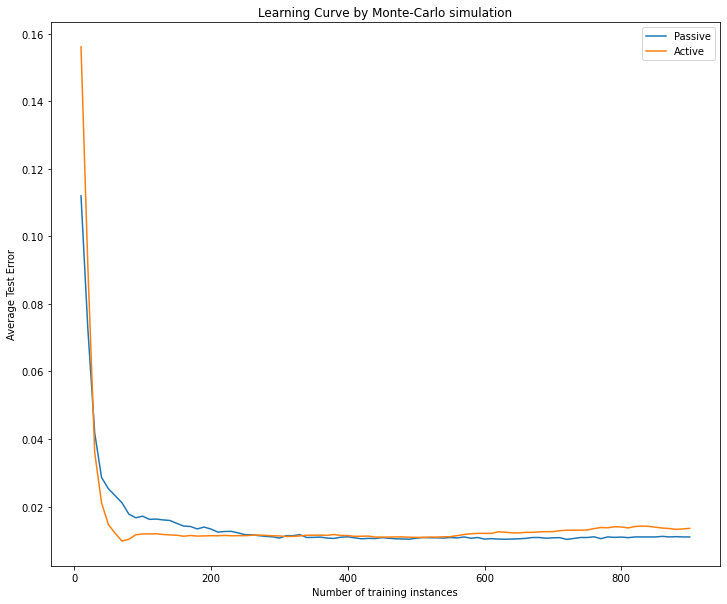

In [31]:
times = np.arange(10, 901, 10)
fig, axes = plt.subplots(figsize=(12, 10))
axes.plot(times, avg_test_error_passive_learning, label='Passive')
axes.plot(times, avg_test_error_active_learning, label='Active')
axes.set_xlabel("Number of training instances")
axes.set_ylabel("Average Test Error")
axes.legend()
axes.set_title("Learning Curve by Monte-Carlo simulation")
plt.show()

<b> Answer : </b>
- When training a model with small data, active learning shows higher performance than passive learning.

### Reference
- StandardScaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- Kmeans : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- distance : https://stackoverflow.com/questions/41443118/select-5-data-points-closest-to-svm-hyperlane
- Spectral clustering : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
- K neighrbors : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html